## <center>Dealing with Outliers</center>

In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Remember that even if a data point is an outlier, its still a data point! Carefully consider your data, its sources, and your goals whenver deciding to remove an outlier. Each case is different!

#### Lecture Goals
* Understand different mathmatical definitions of outliers
* Use Python tools to recognize outliers and remove them

### Useful Links

* [Wikipedia Article](https://en.wikipedia.org/wiki/Outlier)
* [NIST Outlier Links](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Example to understand outliers

#### Generating Data

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

#### Visualize and Describe the Data

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


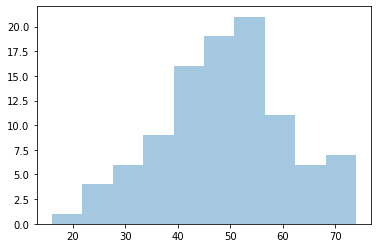

In [4]:
sns.distplot(sample,bins=10,kde=False);

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


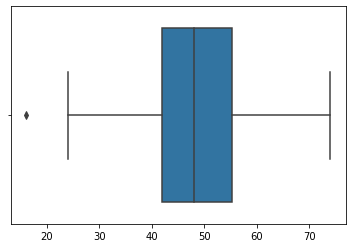

In [5]:
sns.boxplot(sample);

In [6]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

#### Trimming or Fixing Based Off Domain Knowledge

In [7]:
q75, q25 = np.percentile(ser, [75,25])

iqr = q75 - q25
iqr

13.25

In [8]:
# In this case based on the interquantile range, the outliers could be trimmed

lower_limit = q25 - 1.5*iqr
upper_limit = q75 + 1.5*iqr

fil = (ser > lower_limit) & (ser < upper_limit)
ser[fil] # --> only one point gets dropped, one outlier, like it is seen in the boxplot graph

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

There are many ways to identify and remove outliers:
* Trimming based off a provided value
* Capping based off IQR or STD
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623